In [3]:
import os
import sys
import copy
import time
import pickle
import numpy as np
import networkx as nx
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import bqm_frustration

In [1]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

In [2]:
qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

In [8]:
L = 20
ratio = 1
save = 0
bqm = bqm_frustration(L, ratio, 0)

In [6]:
sampleset = sampler.sample(bqm, num_reads=100, 
                           label=f'Plot Ising Frustrato', annealing_time=1000, chain_strength=4)

In [7]:
col_map = {}
pos = {}
for state, node in zip(sampleset.record[0][0], sampleset.variables):
    if state == 1:
        col_map[node] = [123/255, 180/255, 248/255]
    else:
        col_map[node] = 'white'
    split = node.split('-')
    x, y = int(split[0]), int(split[1])
    pos[node] = (y, -x)

/tmp/ipykernel_212/3082102834.py:1: DeprecationWarning: BinaryQuadraticModel.to_networkx_graph() is deprecated since dimod 0.10.0 and will be removed in 0.12.0. Use dimod.to_networkx_graph() instead.
  G = bqm.to_networkx_graph()


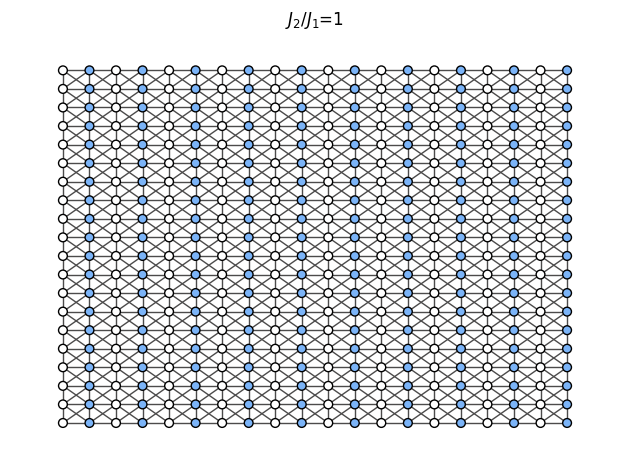

In [9]:
G = dimod.to_networkx_graph(bqm)

node_col = []
for node in G.nodes:
    node_col.append(col_map[node])

#pos = {f'{x}-{y}':(y,-x) for x in range(L) for y in range(L)}
nx.draw_networkx_nodes(G, pos=pos, node_color=node_col, edgecolors='k', node_size=40)

nx.draw_networkx_edges(G, pos=pos, edge_color=[76/255, 75/255, 75/255])
plt.axis('off')
plt.title(rf"$J_2/J_1$={ratio}")
plt.tight_layout()
if save:
    string = f"striped_lattice_config_r{ratio}"
    string = string.replace('.', '')
    plt.savefig("../../Results/Ising_Frustrated/DWave/" + string, transparent=True)

In [10]:
dwave.inspector.show(sampleset)

Serving Inspector on https://18000-yellow-puffin-9814dwxb.ws.ide.dwavesys.io/?problemId=15130d08-2d49-4a4a-934b-5f06df4d289f

'https://18000-yellow-puffin-9814dwxb.ws.ide.dwavesys.io/?problemId=15130d08-2d49-4a4a-934b-5f06df4d289f'